In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file = open('red_red_wine.txt', 'r')

lines = 0

for line in file:
    b = line.strip()
    if b != '':
        lines += 1

file.close()

file1 = open('red_red_wine.txt', 'r')

emotion = np.zeros((5, lines + 1), dtype=float) # a 5x15 array (5 emotions, 0:14 lines)

lines = 0
vec = [0,0,0,0,0]; 

for line in file1:
    b = line.strip()
    score = te.get_emotion(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate song as a whole later
        vec = [vec[0] + score['Happy'], vec[1] + score['Angry'], vec[2] + score['Surprise'], vec[3] + score['Sad'], vec[4] + score['Fear']]
    
        # evaluate song using equation similar to net sentiment rate
        for i in range(5) :
                emotion[i, lines] = vec[i] / lines
    
# Closing file(s)
file1.close()

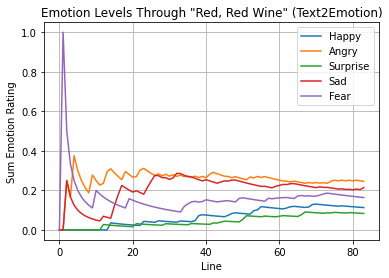

In [4]:
# increase of emotions throughout reading the song
plt.plot(emotion[0], label = 'Happy')
plt.plot(emotion[1], label = 'Angry')
plt.plot(emotion[2], label = 'Surprise')
plt.plot(emotion[3], label = 'Sad')
plt.plot(emotion[4], label = 'Fear')
plt.title('Emotion Levels Through "Red, Red Wine" (Text2Emotion)')
plt.xlabel('Line')
plt.ylabel('Sum Emotion Rating')
plt.legend()
plt.grid(True)
plt.show()